## Initialisation

In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_group import BenchmarkGroup
from joinbench.benchmark_plotter import BenchmarkPlotter
from joinbench.evaluation_method_plotter import EvaluationMethodPlotter
from joinbench.benchmark_group_plotter import BenchmarkGroupPlotter

In [3]:
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
def generate_figure_path(name: str) -> str:
    return f"../report/figures/{name.replace(' ', '-')}.pgf"

## Exploring data

In [34]:
benchmarks: BenchmarkGroup = BenchmarkGroup.load_with_counts([10, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], path="../data/")
benchmark = benchmarks.get_benchmark_with_count(50)

In [35]:
names = benchmark.get_report_names_in_order()
names

['join on onePercent/Product equijoin',
 'join on onePercent/Comprehension equijoin',
 'join on onePercent/Indexed equijoin',
 'join onePercent and twentyPercent/Product equijoin',
 'join onePercent and twentyPercent/Comprehension equijoin',
 'join onePercent and twentyPercent/Indexed equijoin',
 'join onePercent and fiftyPercent/Product equijoin',
 'join onePercent and fiftyPercent/Comprehension equijoin',
 'join onePercent and fiftyPercent/Indexed equijoin',
 'join even and odd/Product equijoin',
 'join even and odd/Comprehension equijoin',
 'join even and odd/Indexed equijoin']

In [36]:
group_names = benchmark.get_benchmark_group_names()
group_names

{'join even and odd',
 'join on onePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and twentyPercent'}

In [37]:
group_map = benchmark.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join on onePercent': [(0, 'Product equijoin'),
              (1, 'Comprehension equijoin'),
              (2, 'Indexed equijoin')],
             'join onePercent and twentyPercent': [(3, 'Product equijoin'),
              (4, 'Comprehension equijoin'),
              (5, 'Indexed equijoin')],
             'join onePercent and fiftyPercent': [(6, 'Product equijoin'),
              (7, 'Comprehension equijoin'),
              (8, 'Indexed equijoin')],
             'join even and odd': [(9, 'Product equijoin'),
              (10, 'Comprehension equijoin'),
              (11, 'Indexed equijoin')]})

In [38]:
benchmark.get_benchmark_mean_from_index(0)

4.4168602884361596e-05

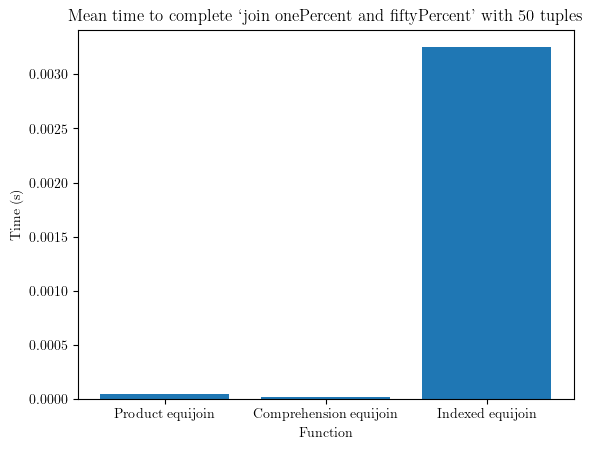

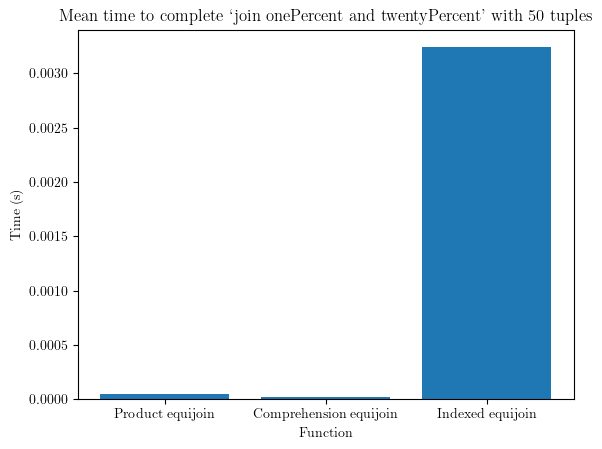

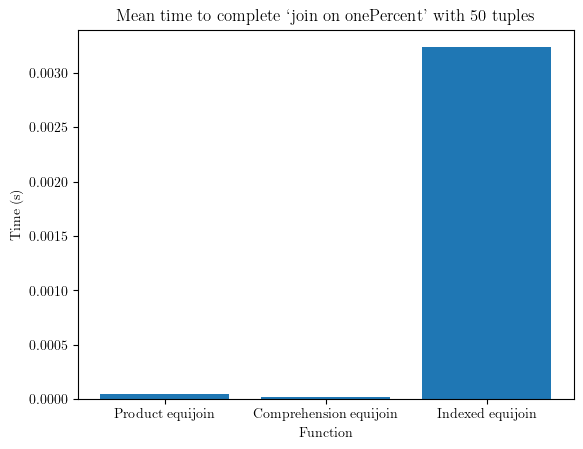

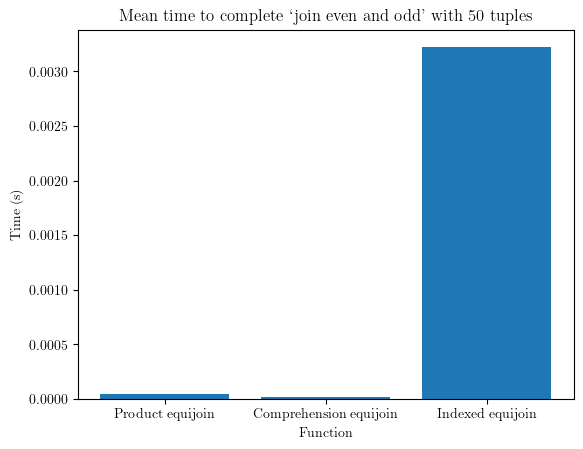

In [39]:
plotter = BenchmarkPlotter(benchmark)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
    plt.savefig(generate_figure_path(group_name))
plt.show()

In [40]:
benchmark.get_benchmark_mean('join on onePercent', 'Product equijoin')

4.4168602884361596e-05

## Teseting evaluation form

In [41]:
nf = benchmark
whnf = BenchmarkData.load_with_count(1000, path="../data/whnf/")

In [42]:
whnf_plotter = BenchmarkPlotter(whnf)
# whnf_plotter.plot_benchmark_group_means(ax, g

In [43]:
bg = list(whnf.get_benchmark_group_names())[0]
bg

'join onePercent and fiftyPercent'

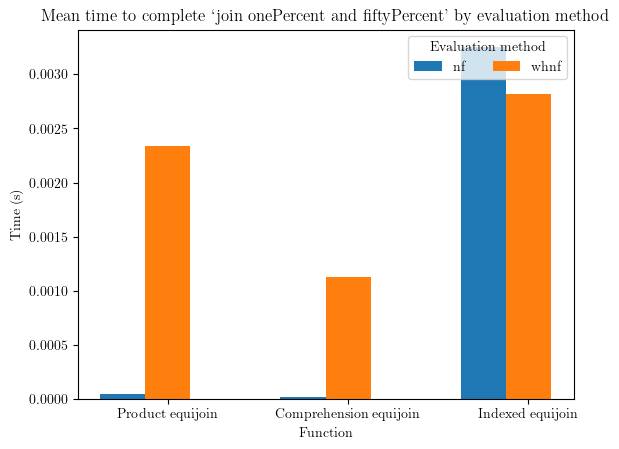

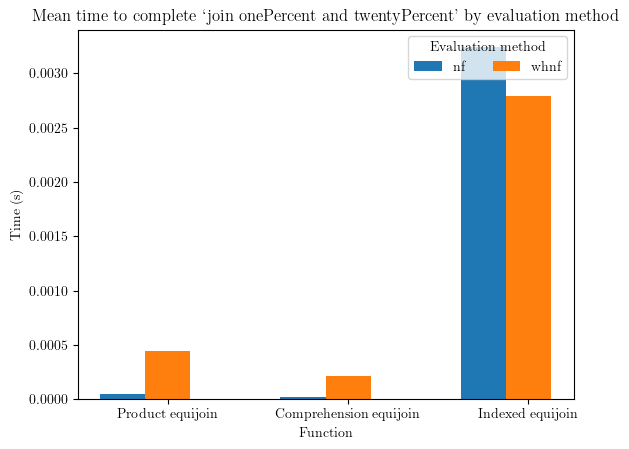

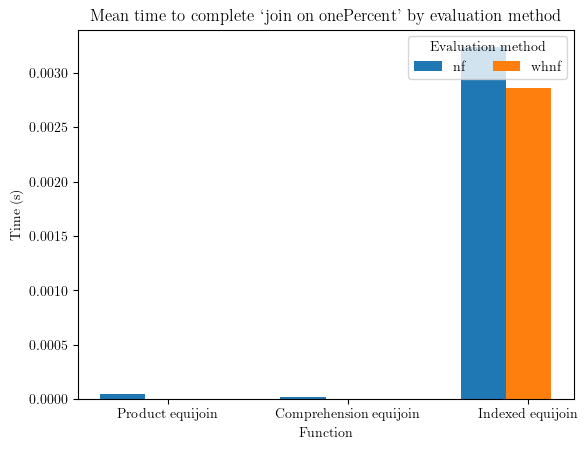

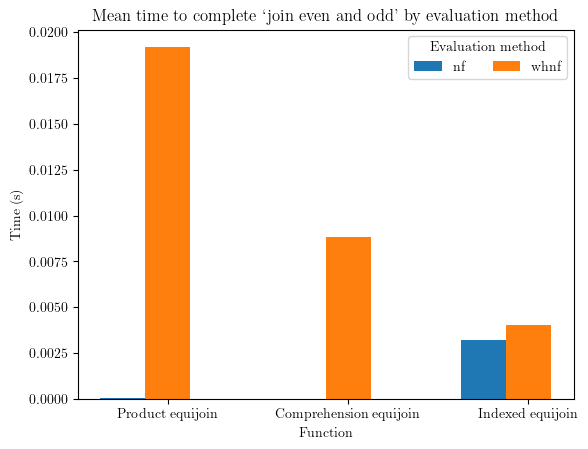

In [44]:
emp = EvaluationMethodPlotter(nf, whnf)

for group in nf.get_benchmark_group_names():
    fig, ax = plt.subplots()
    emp.plot_benchmark_group_means_comparison(ax, group)
    plt.show()

## Testing difference with tuple count

In [45]:
xs = benchmarks.get_tuple_counts()
xs

[10,
 50,
 100,
 250,
 500,
 750,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000]

In [46]:
benchmark.get_function_name_list()

['Indexed equijoin', 'Comprehension equijoin', 'Product equijoin']

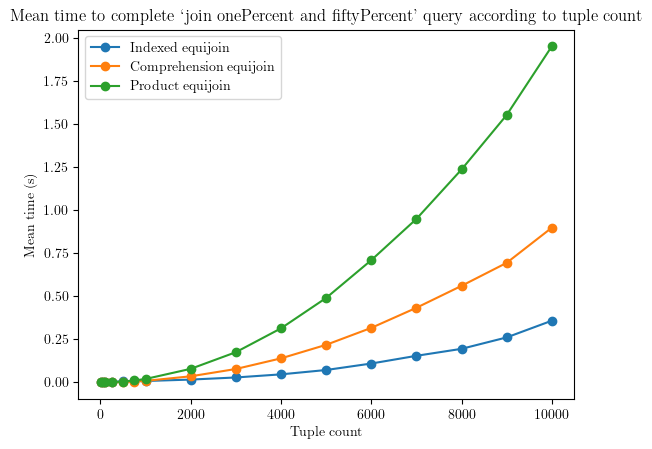

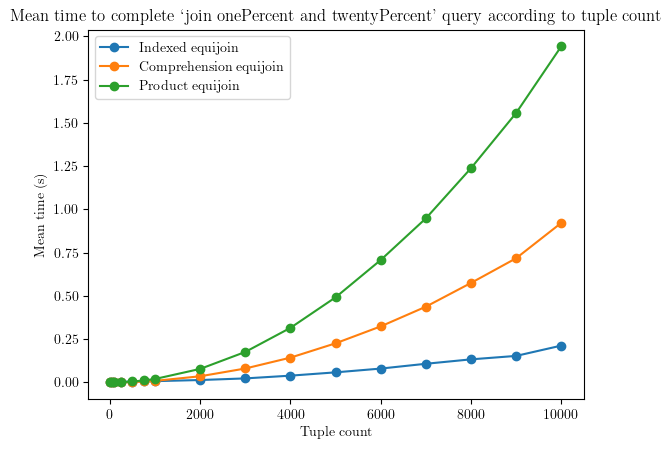

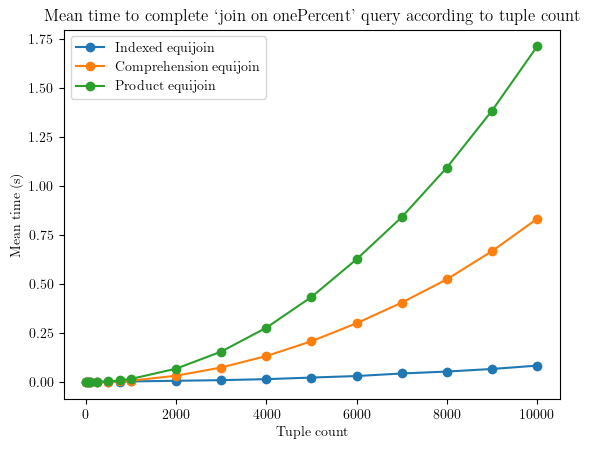

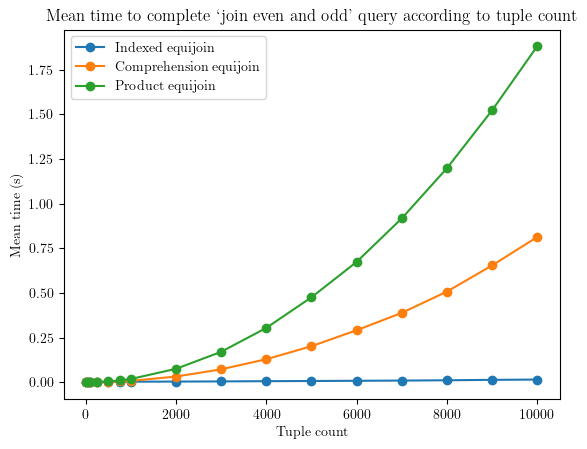

In [47]:
group_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(benchmarks)

groups = benchmark.get_benchmark_group_names()

for group in groups:
    fig, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"mean time for {group} by tuple count"))